In [7]:

import rustworkx as rx
from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 
from qiskit.circuit.library import RZZGate, RXGate
from qiskit.quantum_info import SparsePauliOp

In [14]:
def max_cut_hamiltonian (graph: rx. PyGraph) -> SparsePauliOp: 
    terms = [["", [], 0.5* graph.num_edges()]]

    for edge in graph.edge_list():
        terms.append(["ZZ", edge, -0.5])
    
    return SparsePauliOp.from_sparse_list(terms, num_qubits=graph.num_nodes())

In [15]:
def qaoa_circuit (graph: rx.PyGraph, p: int) -> QuantumCircuit: 
    betas = [Parameter(f"b_{i}") for i in range(p)]

    gammas = [Parameter (f"g_{i}") for i in range (p)]

    qubits = QuantumRegister(graph.num_nodes())

    circuit = QuantumCircuit(qubits)
    circuit.h(qubits)

    for beta, gamma in zip (betas, gammas):
        
        for i, j in graph.edge_list():
            circuit.append(RZZGate (gamma), [qubits[i], qubits[j]]) 
        
        for q in qubits:
            circuit.append(RXGate (beta), [q])

    return circuit

In [29]:

n_qubits = 5 

probability = 0.8

graph = rx.undirected_gnp_random_graph(num_nodes=n_qubits, probability=probability)

observable = max_cut_hamiltonian(graph)

print(observable)

SparsePauliOp(['IIIII', 'IIZIZ', 'IIZZI', 'IZIZI', 'IZZII', 'ZIIIZ', 'ZIIZI', 'ZIZII', 'ZZIII'],
              coeffs=[ 4. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j, -0.5+0.j])


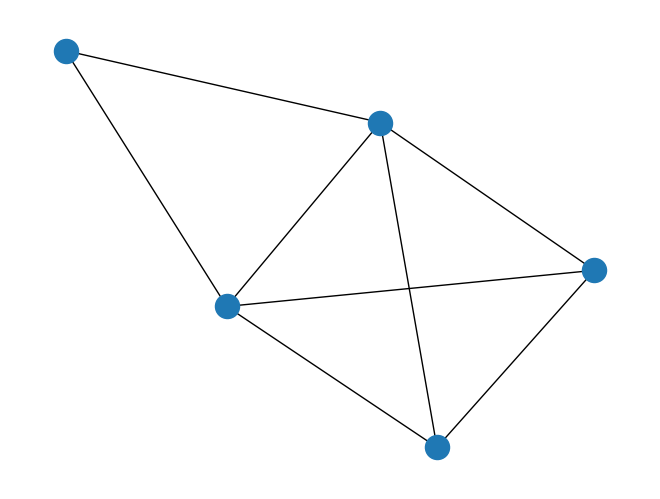

In [30]:
from rustworkx. visualization import mpl_draw

mpl_draw(graph)